In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import SHMF, CSMF, SHMR
import galhalo
import os

In [14]:
as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

as_data[:, 0] = 0.0  # removing the host mass from the matrix
zero_mask = as_data != 0.0 
Mh = np.log10(np.where(zero_mask, as_data, np.nan)) #switching the to nans!

In [15]:
def SMF(mass, Nbins=50, plot=True):
    
    def histofunc(mass, bins=False): # nested function
        if bins==True:
            return np.histogram(mass, range=(3, 10), bins=Nbins)
        else:
            return np.histogram(mass, range=(3, 10), bins=Nbins)[0]

    # now to start counting!
    m_counts, bins = histofunc(mass[0], bins=True)  # to be keep in memory, only needs to be measured once
    binsize = (bins[1] - bins[0])
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    I = np.apply_along_axis(histofunc, 1, mass)  # this applies the histogram to the whole matrix

    SHMF_ave = np.average(I, axis=0)

    SHMF_std = np.std(I, axis=0)
        
    if plot == True:
        plt.figure(figsize=(8, 8))

        plt.plot(bincenters, SHMF_ave/binsize, label="average", color="black")
        plt.plot(bincenters, (SHMF_ave+SHMF_std)/binsize, label="1 $\sigma$", ls=":", color="grey")
        plt.plot(bincenters, (SHMF_ave-SHMF_std)/binsize, ls=":", color="grey")

        plt.grid(alpha=0.4)
        plt.xlabel("log $m_*$", fontsize=20)
        plt.ylabel("log[ dN / dlog($m_*$) ]", fontsize=20)
        plt.yscale("log")
        plt.legend()
        plt.show()

    return bincenters, np.array([SHMF_ave, SHMF_std])

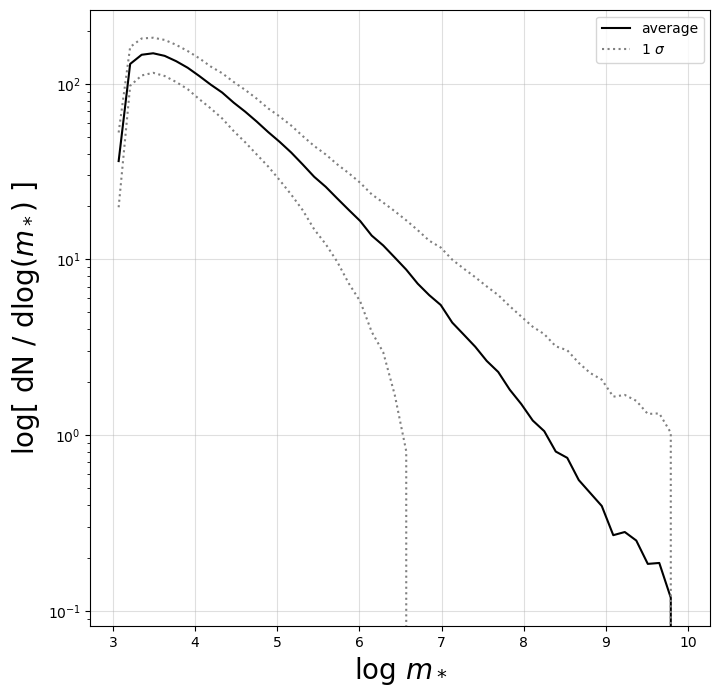

In [16]:
bins, smf = SMF(galhalo.lgMs_D22_det(Mh))

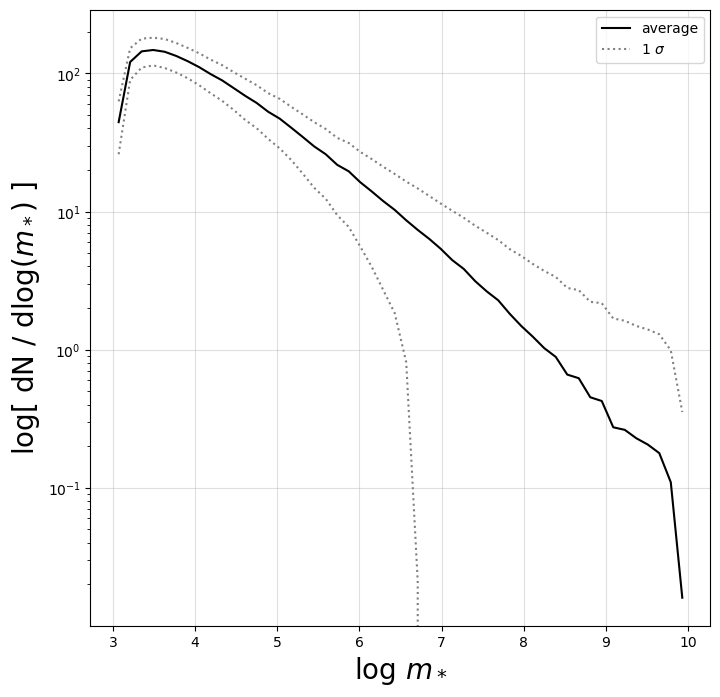

In [17]:
bins_1, smf_1 = SMF(galhalo.lgMs_D22_dex(Mh, dex=0.15))

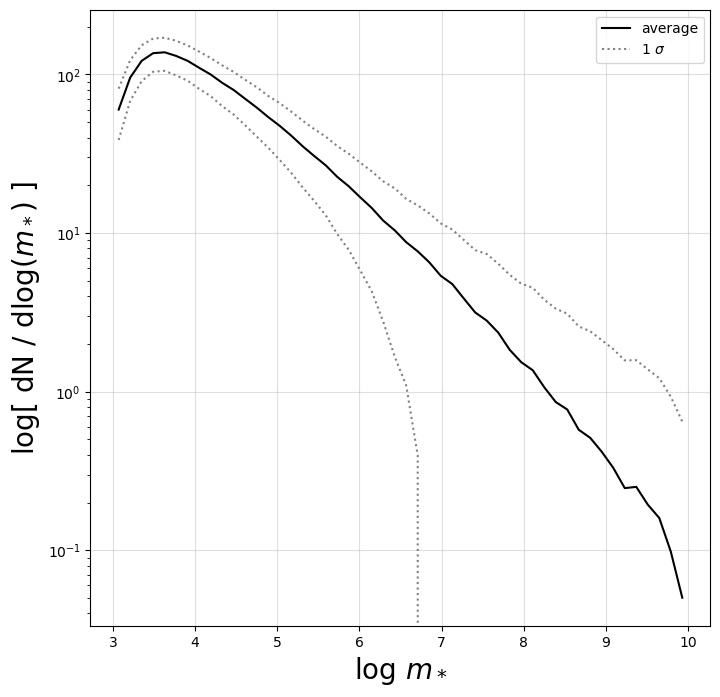

In [18]:
bins_2, smf_2 = SMF(galhalo.lgMs_D22_dex(Mh, dex=0.5))

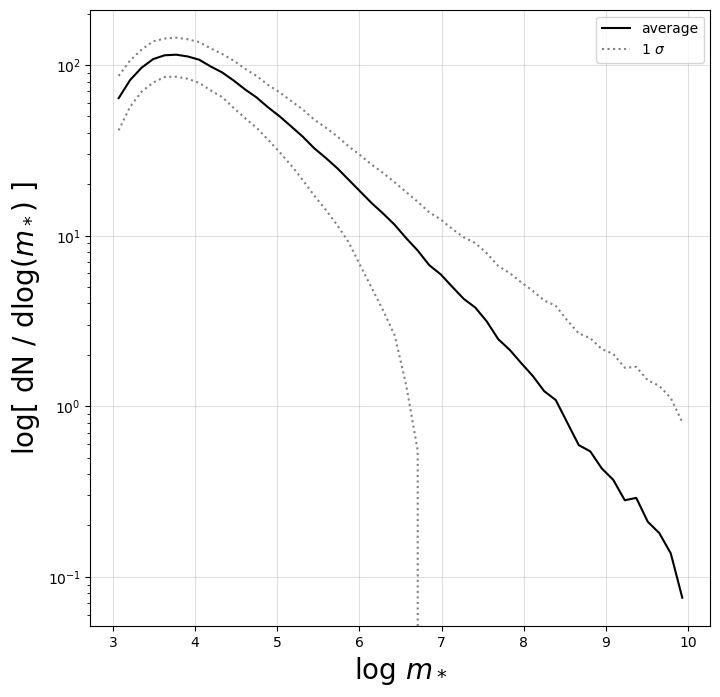

In [19]:
bins_3, smf_3 = SMF(galhalo.lgMs_D22_dex(Mh, dex=1))

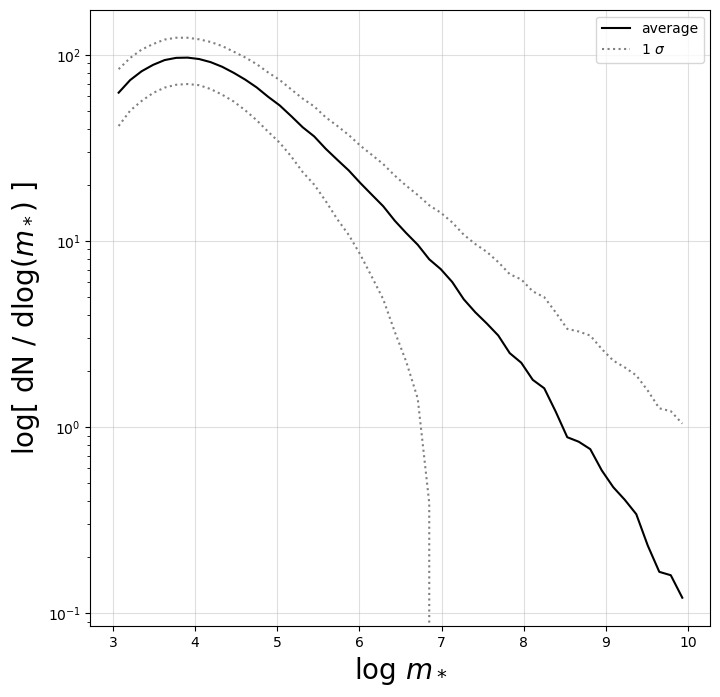

In [20]:
bins_4, smf_4 = SMF(galhalo.lgMs_D22_dex(Mh, dex=1.5))

ValueError: x and y must have same first dimension, but have shapes (1,) and (50,)

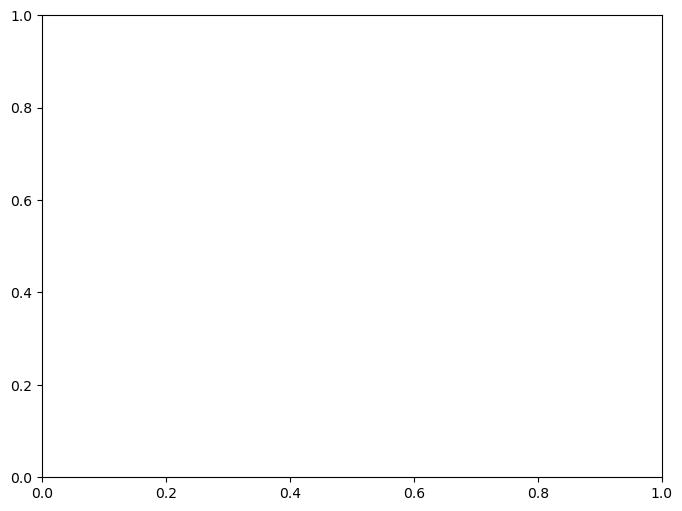

In [44]:
bins =bins[1]-bins[1]
plt.figure(figsize=(8,6))

plt.plot(bins, smf[1], marker=None, label="det", color="black")
plt.plot(bins, smf_3[1], marker=".", label="1 dex")
plt.plot(bins, (smf_3[1]+smf_3[0])/bins, marker=".", label="1 dex")
plt.plot(bins, (smf_3[1]-smf_3[0])/bins, marker=".", label="1 dex")

plt.yscale("log")

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_19041/1732701795.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(bins, smf[1]/smf[0], marker=None, label="det", color="black")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_19041/1732701795.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(bins, 1/np.sqrt(smf[0]), marker=None, label="Poisson")


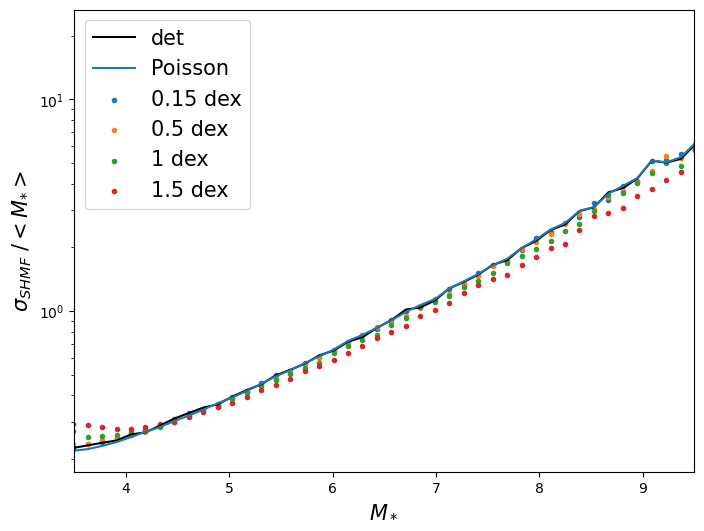

In [22]:
plt.figure(figsize=(8,6))

plt.plot(bins, smf[1]/smf[0], marker=None, label="det", color="black")
plt.plot(bins, 1/np.sqrt(smf[0]), marker=None, label="Poisson")

plt.scatter(bins, smf_1[1]/smf_1[0], marker=".", label="0.15 dex")
plt.scatter(bins, smf_2[1]/smf_2[0], marker=".", label="0.5 dex")
plt.scatter(bins, smf_3[1]/smf_3[0], marker=".", label="1 dex")
plt.scatter(bins, smf_4[1]/smf_4[0], marker=".", label="1.5 dex")

plt.yscale("log")
plt.xlabel("$M_*$")
plt.ylabel("$\sigma_{SHMF}\ / <M_{*}>$", fontsize=15)
plt.xlabel("$ M_* $", fontsize=15)
plt.legend(fontsize=15)
plt.xlim(3.5, 9.5)
plt.show()

### now by scaling in log space

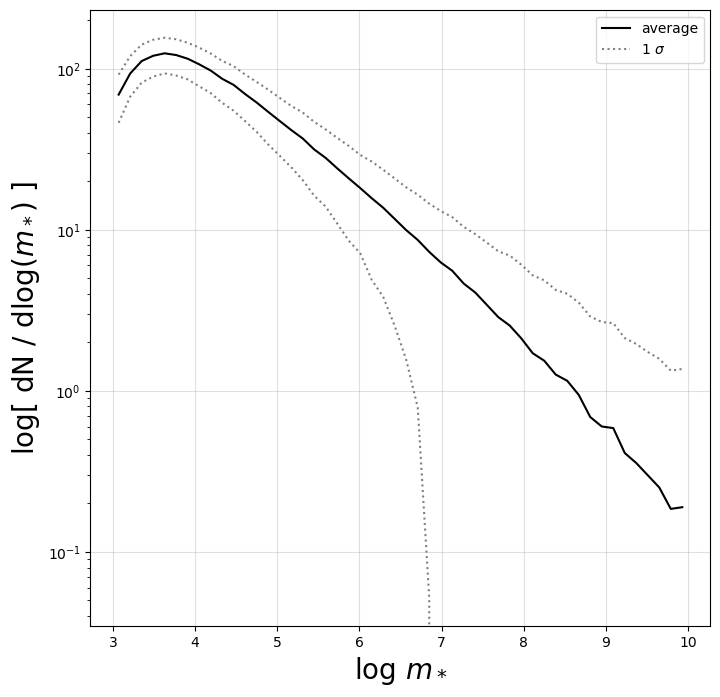

In [25]:
bins_1, smf_1 = SMF(galhalo.lgMs_D22_dex(Mh, dex=0.1))

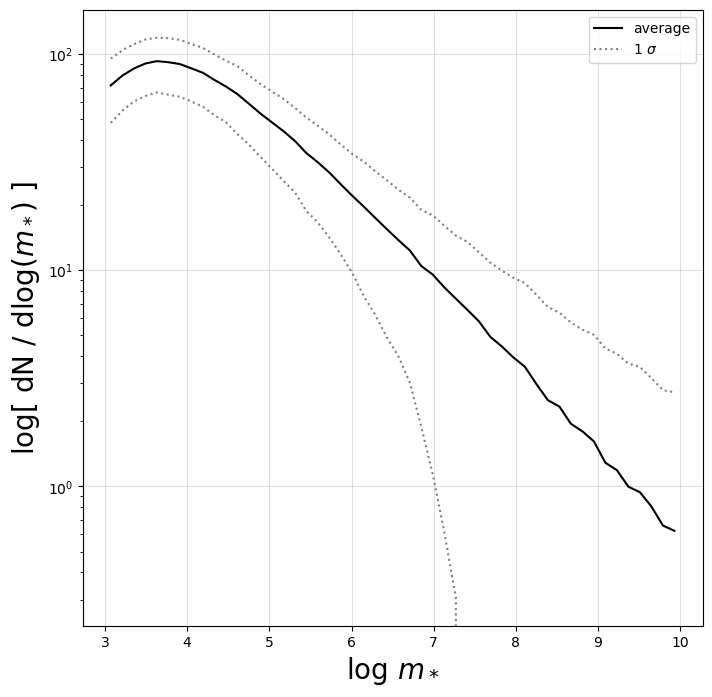

In [27]:
bins_1, smf_1 = SMF(galhalo.lgMs_D22_dex(Mh, dex=0.2))

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_19041/490837267.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(bins, smf[1]/smf[0], marker=None, label="det", color="black")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_19041/490837267.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(bins, 1/np.sqrt(smf[0]), marker=None, label="Poisson")


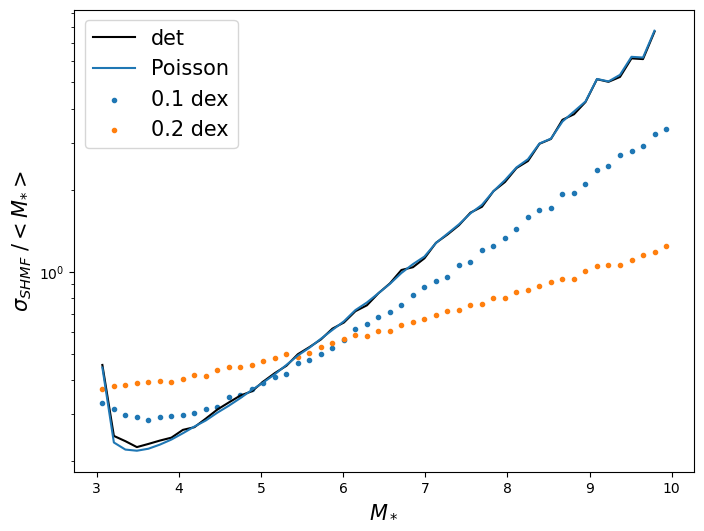

In [31]:
plt.figure(figsize=(8,6))

plt.plot(bins, smf[1]/smf[0], marker=None, label="det", color="black")
plt.plot(bins, 1/np.sqrt(smf[0]), marker=None, label="Poisson")

plt.scatter(bins, smf_1[1]/smf_1[0], marker=".", label="0.1 dex")
plt.scatter(bins, smf_2[1]/smf_2[0], marker=".", label="0.2 dex")

plt.yscale("log")
plt.xlabel("$M_*$")
plt.ylabel("$\sigma_{SHMF}\ / <M_{*}>$", fontsize=15)
plt.xlabel("$ M_* $", fontsize=15)
plt.legend(fontsize=15)
plt.savefig("../figures/log_scale.pdf")
plt.show()

### now averaging over 100 samples

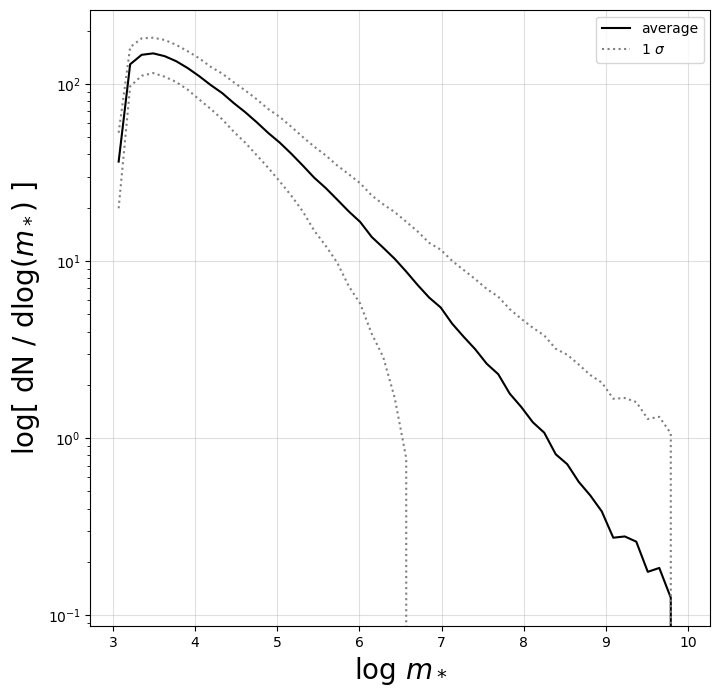

In [33]:
bins_1, smf_1 = SMF(galhalo.lgMs_D22_dex(Mh, dex=0.15, N_samples=100))

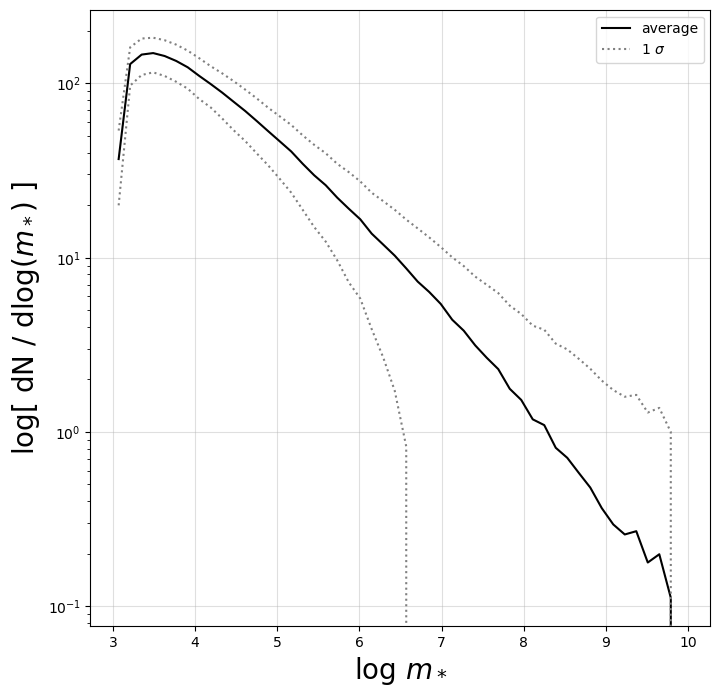

In [34]:
bins_2, smf_2 = SMF(galhalo.lgMs_D22_dex(Mh, dex=0.5, N_samples=100))

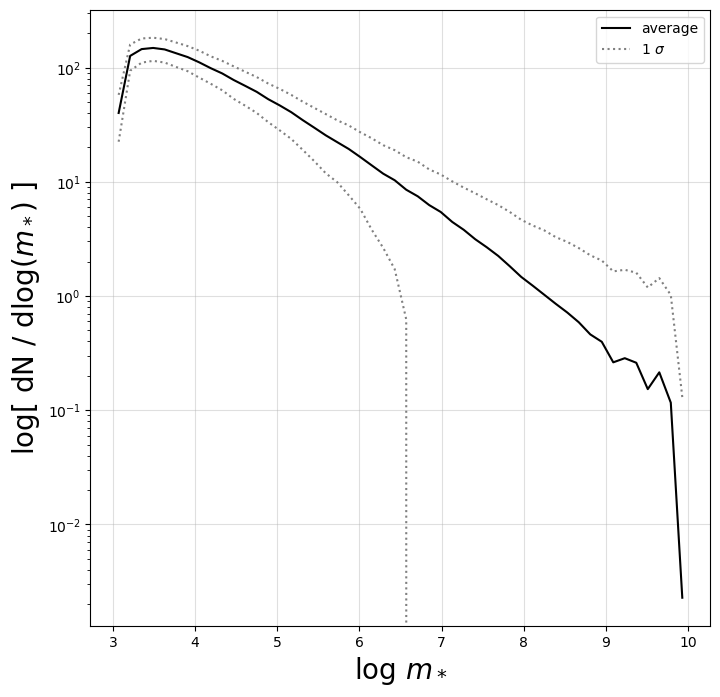

In [35]:
bins_3, smf_3 = SMF(galhalo.lgMs_D22_dex(Mh, dex=1, N_samples=100))

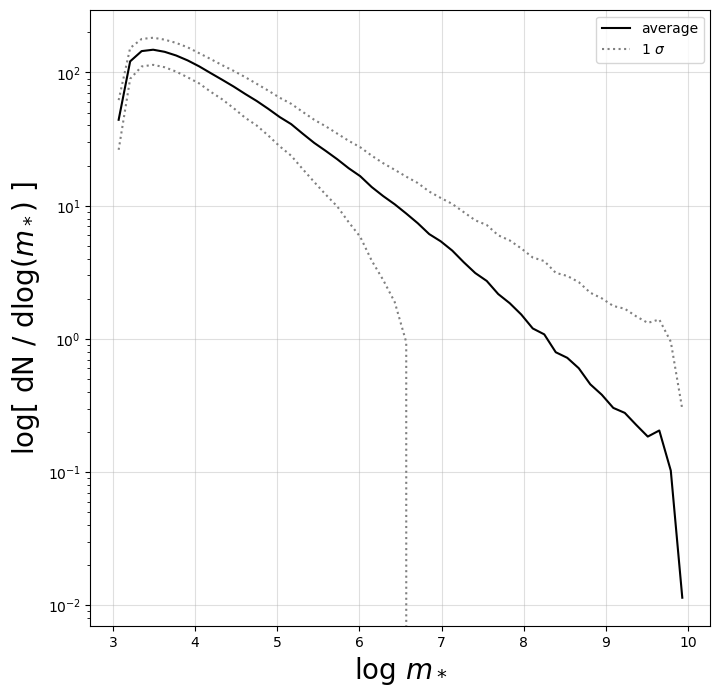

In [36]:
bins_4, smf_4 = SMF(galhalo.lgMs_D22_dex(Mh, dex=1.5, N_samples=100))

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_19041/2014452003.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(bins, smf[1]/smf[0], marker=None, label="det", color="black")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_19041/2014452003.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(bins, 1/np.sqrt(smf[0]), marker=None, label="Poisson")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_19041/2014452003.py:6: RuntimeWarning: invalid value encountered in divide
  plt.scatter(bins, smf_1[1]/smf_1[0], marker=".", label="0.15 dex")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_19041/2014452003.py:7: RuntimeWarning: invalid value encountered in divide
  plt.scatter(bins, smf_2[1]/smf_2[0], marker=".", label="0.5 dex")


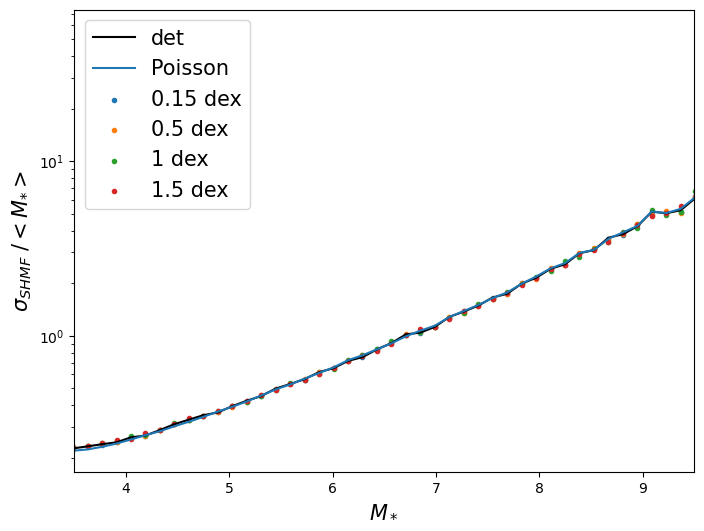

In [38]:
plt.figure(figsize=(8,6))

plt.plot(bins, smf[1]/smf[0], marker=None, label="det", color="black")
plt.plot(bins, 1/np.sqrt(smf[0]), marker=None, label="Poisson")

plt.scatter(bins, smf_1[1]/smf_1[0], marker=".", label="0.15 dex")
plt.scatter(bins, smf_2[1]/smf_2[0], marker=".", label="0.5 dex")
plt.scatter(bins, smf_3[1]/smf_3[0], marker=".", label="1 dex")
plt.scatter(bins, smf_4[1]/smf_4[0], marker=".", label="1.5 dex")

plt.yscale("log")
plt.xlabel("$M_*$")
plt.ylabel("$\sigma_{SHMF}\ / <M_{*}>$", fontsize=15)
plt.xlabel("$ M_* $", fontsize=15)
plt.legend(fontsize=15)
plt.xlim(3.5, 9.5)
plt.savefig("../figures/averaging_smooths.pdf")
plt.show()